
## Google News - BeautifulSoup Applications

- 구글 뉴스: https://news.google.com/search?q=백신&hl=ko&gl=KR&ceid=KR%3Ako
- XML: https://news.google.com/rss/search?q=백신&hl=ko&gl=KR&ceid=KR%3Ako

(remember that one can view the rss version of html file by simply adding /rss next to com/)

In [2]:
# import necesssary modules
import requests
import bs4
import pandas as pd

# send request/ receive response from the server (google news)
url = 'https://news.google.com/rss/search?q=백신&hl=ko&gl=KR&ceid=KR%3Ako'
response = requests.get(url).text

# convert xml object into beautifulsoup class object
# use beautifulsoup to import wanted data
news_data = bs4.BeautifulSoup(response, features = 'xml')
news_data.find_all('item')[0].find('title').text

"백신은 왜 '감염의 안전벨트'인가…자연면역과 백신면역의 차이 - 한겨레"

In [3]:
# Do the crawling based on the keyword "반도체" using beautifulsoup module
kw = '반도체'
url = f'https://news.google.com/rss/search?q={kw}&hl=ko&gl=KR&ceid=KR%3Ako'
response = requests.get(url).text
news_data = bs4.BeautifulSoup(response, features='xml')
news_list = news_data.find('channel').find_all('item')

# organize crawled data
news_data = []
for x in news_list:
    title = x.find('title').text # news.title
    link = x.find('link').text
    pubDate = x.find('pubDate').text
    news_data.append({'title':title, 'link':link, 'pubDate':pubDate})
    
df = pd.DataFrame(news_data)
df

,title,link,pubDate
0,"""한국이 일본 이긴 결정적 이유?"" 대만 `반도체 대부`가 밝힌 비밀 - 매일경제",https://www.mk.co.kr/news/world/view/2022/03/2...,"Sun, 27 Mar 2022 16:52:23 GMT"
1,TSMC '넘사벽' 1위 굳히나...반도체 수주 확대 - ZD넷 코리아,https://zdnet.co.kr/view/?no=20220325123152,"Fri, 25 Mar 2022 04:10:18 GMT"
2,"KT, 드론 띄워 안전 지킨다…삼성 반도체 사업장에 설치 - 매일경제",https://www.mk.co.kr/news/it/view/2022/03/276597/,"Sun, 27 Mar 2022 09:21:20 GMT"
3,"[단독] 美, 韓에 '칩4 동맹' 제안…'반도체망서 中 고립' - 서울경제 - 서울...",https://www.sedaily.com/NewsVIew/263KWTWF35,"Sun, 27 Mar 2022 08:33:35 GMT"
4,"GM, 반도체 부족에 픽업트럭 일부 생산 중단 - 조선비즈 - 조선비즈",https://biz.chosun.com/international/internati...,"Sat, 26 Mar 2022 23:24:00 GMT"
...,...,...,...
95,"큐알티, '정전기 방전 보호용 반도체 소자' 개발기술 특허 출원 - 디일렉",http://www.thelec.kr/news/articleView.html?idx...,"Wed, 02 Mar 2022 08:00:00 GMT"
96,삼성전자·TSMC·하이닉스… 반도체 종목 집중투자 - 조선일보 - The Chosu...,https://www.chosun.com/economy/money/2022/03/0...,"Wed, 09 Mar 2022 08:00:00 GMT"
97,"[미국주식톱픽] '그래도 반도체'...서학개미, 반도체 레버리지 3배 베팅 - 뉴스핌",https://m.newspim.com/news/view/20220311000500,"Sat, 12 Mar 2022 21:00:00 GMT"
98,"현대모비스, 반도체 설계 경력직 대거 채용하는 이유는 [뒷북비즈] - 서울경제 - ...",https://www.sedaily.com/NewsVIew/263ASYMMEV,"Sat, 05 Mar 2022 08:00:00 GMT"


In [4]:
df.to_csv(kw+'.csv', index=False, encoding='utf-8-sig')

## Basics of Web Crawling

- prepare for request
- send "get request", receive response from the server
- the type of analysis module that is used will depend on the type of response received (JSON, XML)
- the way of analysis (dictionary, tag) also depends on the processing
- organize data in the right way (using data frame) according to the processing
- save the file

## Difference between XML and HTML
- In XML, tag names are titles that represent the information inside the tag
- In HTML, this is not the case, and tags are used merely for design purpose 
- (e.g. strong tag that highlights characters, <strong>스트롱 태그</strong>)
- (e.g. h1 tag that enlarges characters, <h1>h1 tag</h1>)
- (view these examples in edit mode))
- therefore, tags in HTML cannot accessed in dictionary forms

## So what do we have to be careful when coding?
- designs or functions that are same should use the same tag 
- some tags may have the same name, but the kind of information may be different inside each tag, or the information that we are looking for may be found in some tags while not in other tags. 


- live feed issue related key words -> stored in span - a tags
- f12 on chorme opens up developer tool page
- click the small cursor icon on the top left corner of the developer tool page
- move the cursor onto the live feed issue keyword bar, it will display where this live feed issue keyword bar is in the html file (in our case it has the div tag)
- click the live feed issue keyword bar, and this will highlight the exact position of this information within html.

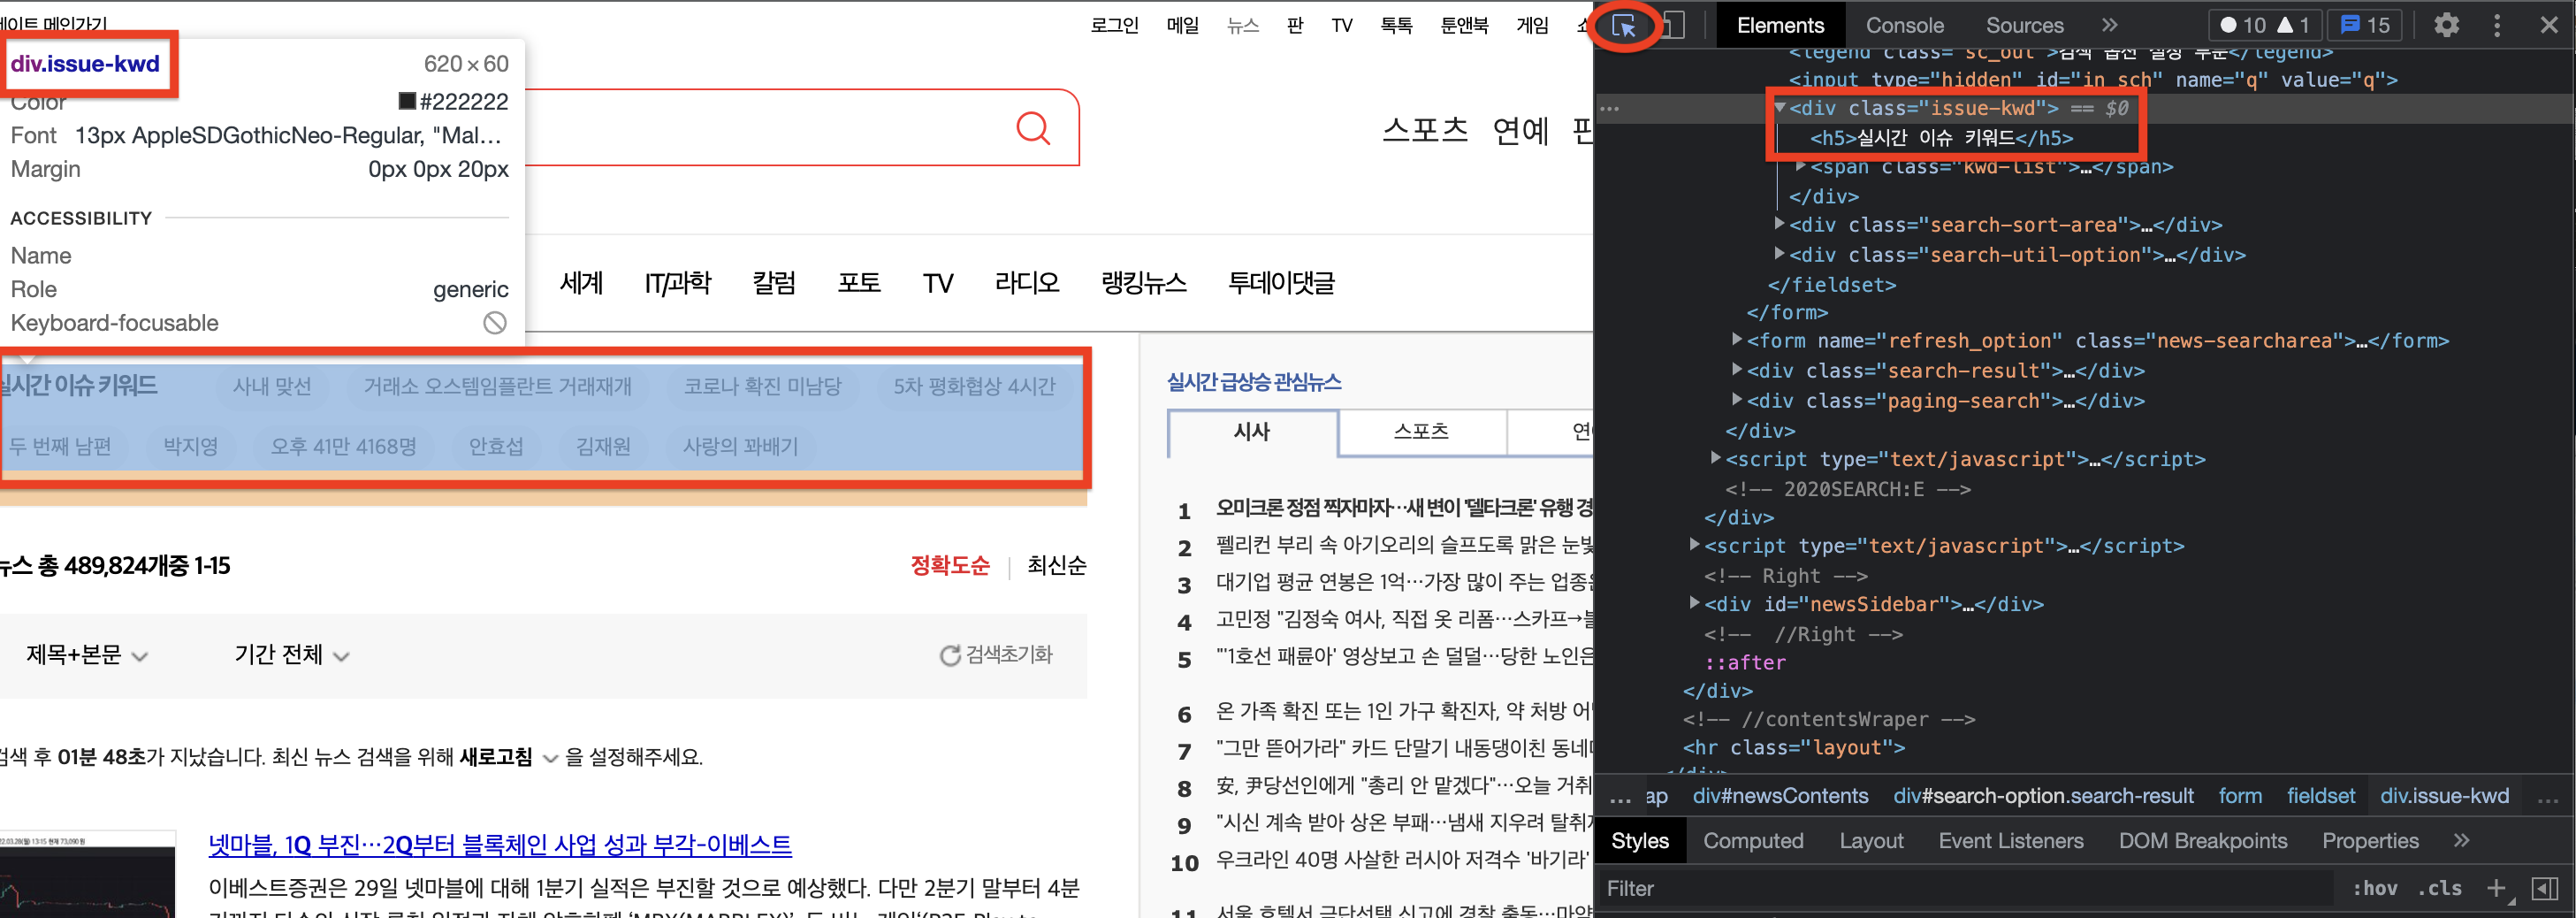

- key word information is stored under the div tag, span tag, and each individual -a tag. We would like to crawl these data
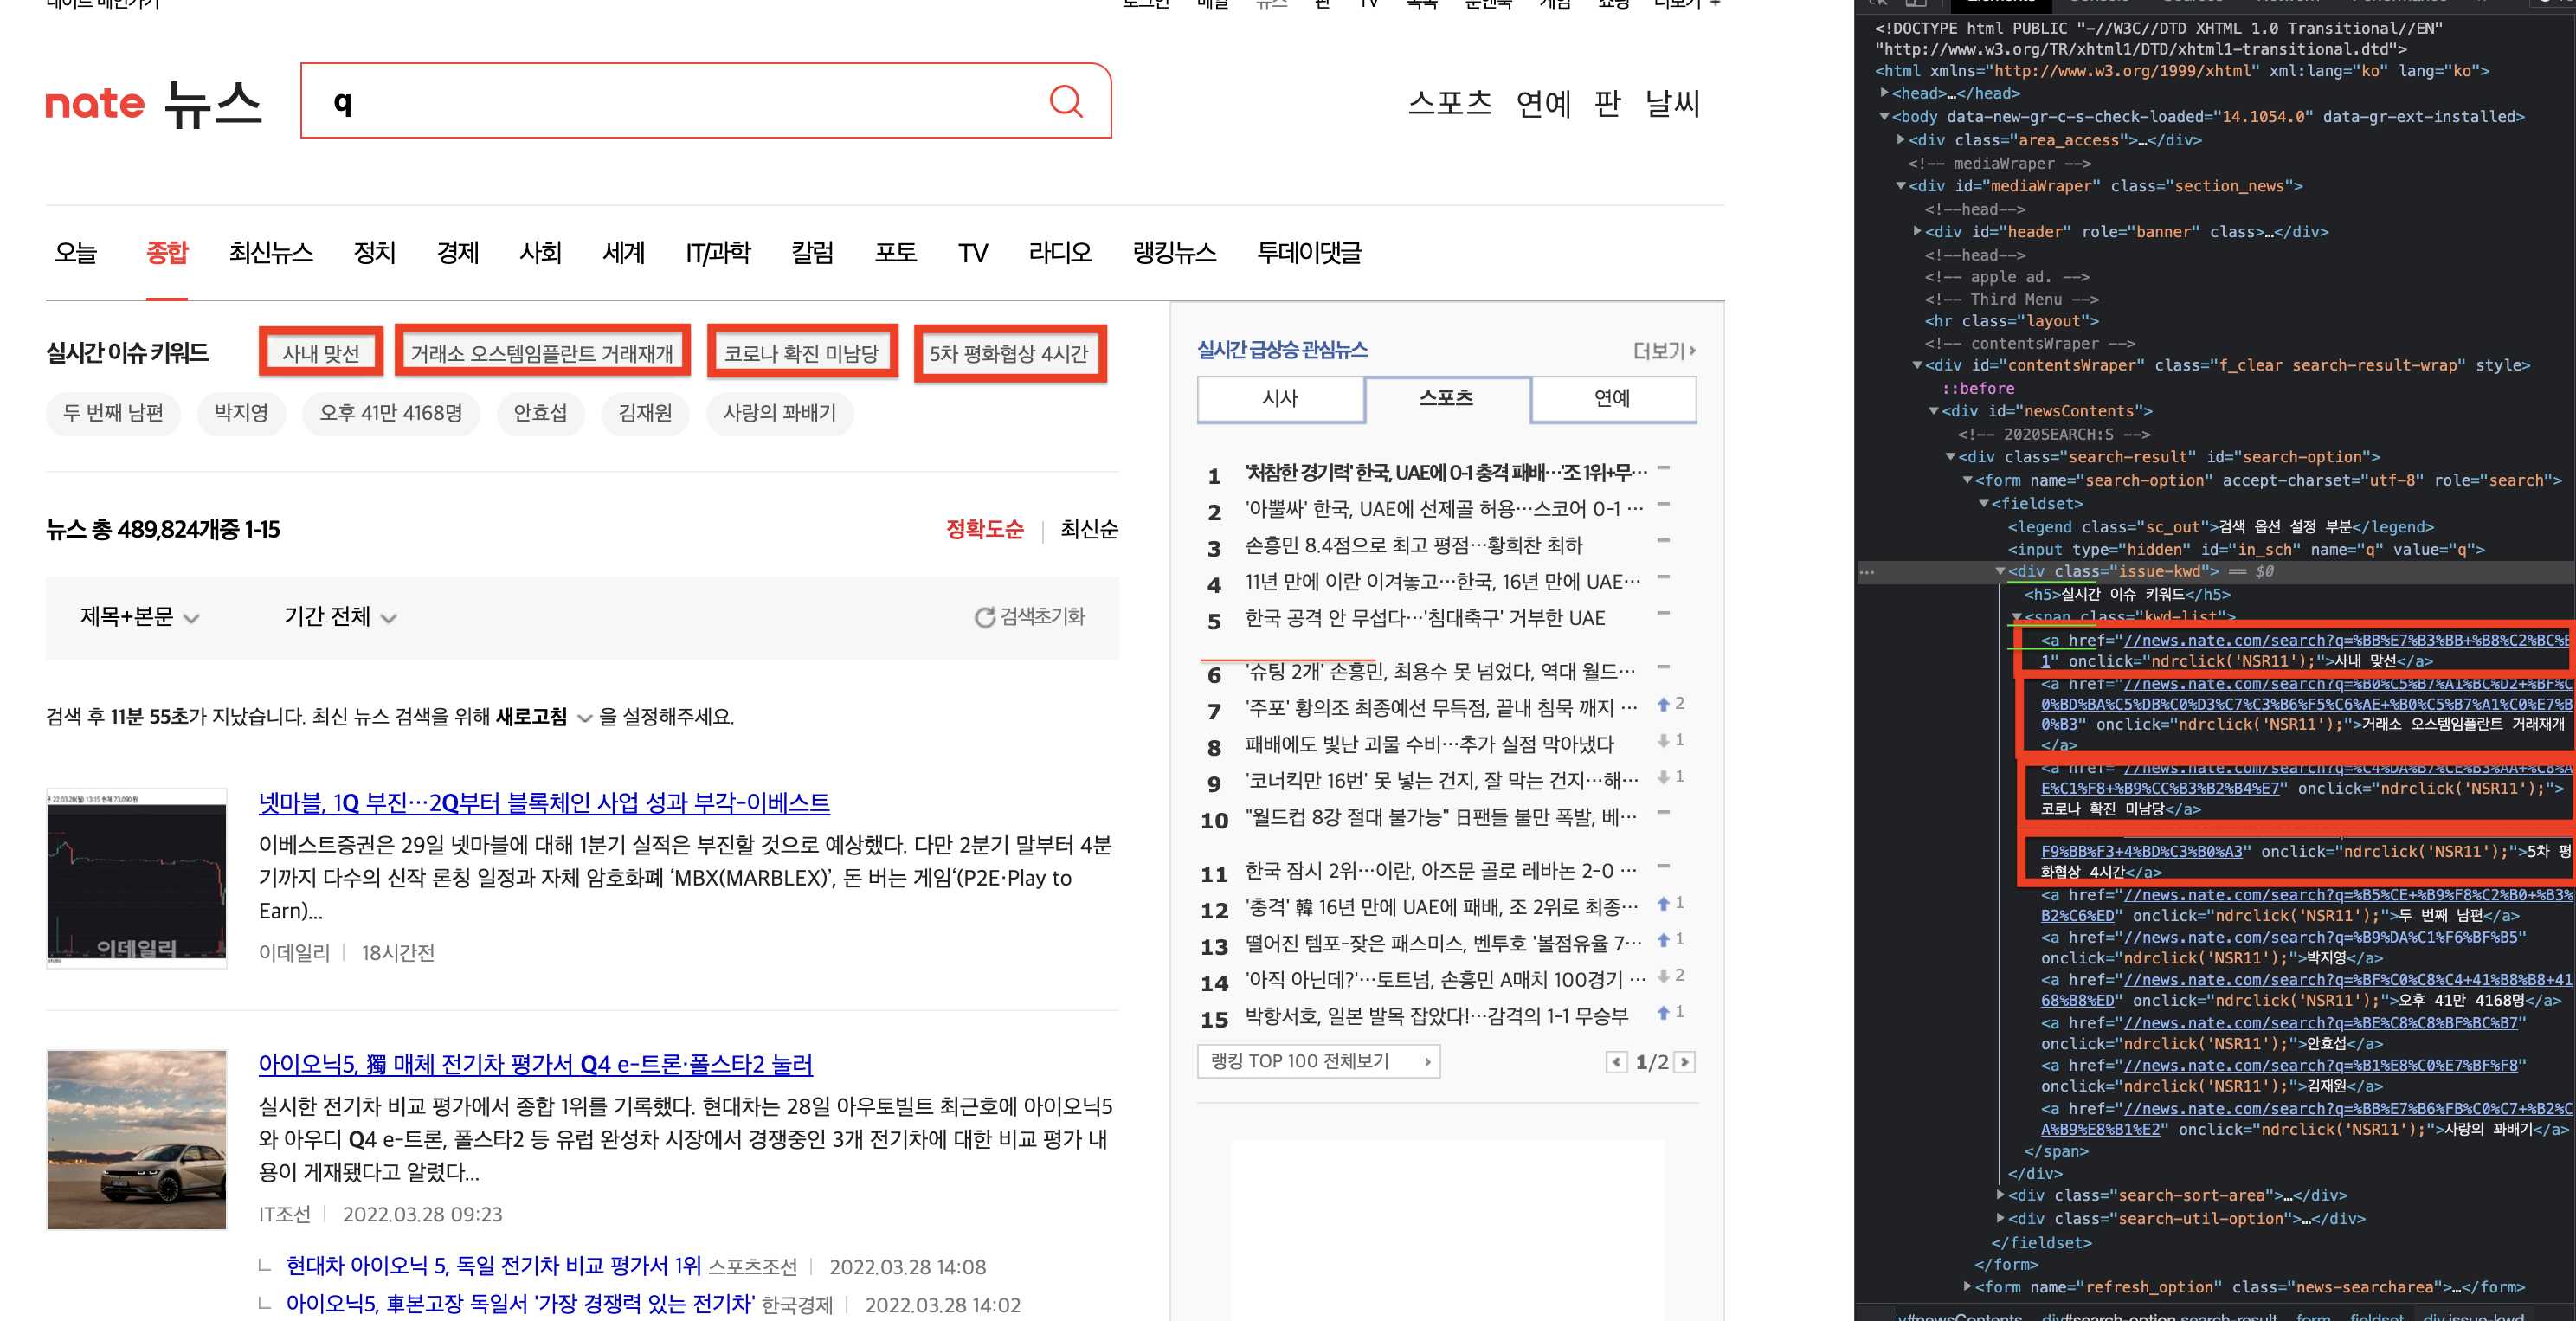


- number of span tags is usuualy large -> find or find_all may take too many time to search -> so we have to find the right span tag (merely instead of a tag name) in order to find the info we want.
- span tags are differentiated by classes, and in this case the class of span tags for the data we want to crawl is "kwd-list"
- to find the tag using its tag name : .find('span')
- to find the specific tag by differentiating classes: .find('span', {"class":"kwd-list"})

In [16]:
# import necesssary modules
import requests
import bs4
import pandas as pd

# send request/ receive response from the server 
url = 'https://news.nate.com/search?q=q'
response = requests.get(url).text

# convert xml object into beautifulsoup class object
# use beautifulsoup to import wanted data: try importing 7th keyword displayed in the live issue feed.
nate_newspage = bs4.BeautifulSoup(response)
kwd_livefeed = nate_newspage.find('span', {"class":"kwd-list"})
kwd_livefeed.find_all('a')[8].text

'군검사 도베르만'

In [27]:
# try printing all 10 keywords
for kwd in kwd_livefeed.find_all('a'):
    print(kwd.text)

# import all 10 keywords and store them in a list
kwd_list = []
for x in kwd_livefeed.find_all('a'):
    kwd_list.append(x.text)

kwd_list

사내 맞선
거래소 오스템임플란트 거래재개
코로나 확진 미남당
박지영
김재원
두 번째 남편
5차 평화협상 4시간
안효섭
군검사 도베르만
사랑의 꽈배기


['사내 맞선',
 '거래소 오스템임플란트 거래재개',
 '코로나 확진 미남당',
 '박지영',
 '김재원',
 '두 번째 남편',
 '5차 평화협상 4시간',
 '안효섭',
 '군검사 도베르만',
 '사랑의 꽈배기']

In [29]:
def top_10():
    #import information from nate news webpage and convert it into beautifulsoup class 
    url = 'https://news.nate.com/search?q=q'
    response = requests.get(url).text
    nate_newspage = bs4.BeautifulSoup(response)
    
    #find all the live issue keywords under the span tag, speicifically with class kwd-list
    kwd_livefeed = nate_newspage.find('span', {"class":"kwd-list"})
    
    #append all keywords stored in a-tags into a list 
    kwd_list = []
    for x in kwd_livefeed.find_all('a'):
        kwd_list.append(x.text)

    return kwd_list

top_10()

['사내 맞선',
 '박지영',
 '두 번째 남편',
 '사랑의 꽈배기',
 '안효섭',
 '군검사 도베르만',
 '김재원',
 '거래소 오스템임플란트 거래재개',
 '임창정',
 '홍자']

In [30]:
import xmltodict

#define a function that crawls and stores the news data from google news according to the keyword input by the user
def news_get(input_kw):
    url = f'https://news.google.com/rss/search?q={input_kw}&hl=ko&gl=KR&ceid=KR%3Ako'
    response = requests.get(url).text
    news_data = xmltodict.parse(response)
    
    news_list = news_data['rss']['channel']['item']
    pd.DataFrame(news_list).to_csv(input_kw+'.csv', index=False, encoding='utf-8-sig')
    

# crawl and store the google news related to the top 10 keywords imported from nate news 
import time
for input_kw in top_10():
    time.sleep(2)
    news_get(input_kw)
    

## What can we do with the crawled data?
- 자연어 처리 -> 빈출단어를 이용해 워드클라우드 만들기
- 워드클라우드 이미지 고화질로 저장(마스크 이미지(특정 모양을 본따서 만드는) 이용하는 경우 중요)
- 이미지 저장 후 내 휴대폰으로 보내기 -> telegram 이용시 파이썬 구현 용이

## 알라딘에서 베스트셀러 책 제목 가져오기

- 대상 URL: https://www.aladin.co.kr/shop/common/wbest.aspx?BranchType=1&start=we
- Top-down: 큰 그림부터 이해하고 세부적으로(나무를 보지말고 숲을 보라)
- Bottom-up: (전반적인 원칙보다 먼저)세부적인 데서 출발하는

In [37]:
# import necesssary modules
import requests
import bs4
import pandas as pd

# send request/ receive response from the server (google news)
url = 'https://www.aladin.co.kr/shop/common/wbest.aspx?BranchType=1&start=we'
response = requests.get(url).text

# convert xml object into beautifulsoup class object
# use beautifulsoup to import wanted data
aladin_page = bs4.BeautifulSoup(response)
aladin_page.find_all('b')


# 책 제목은 b 태그에 있지만 b 태그에는 책 제목이 아닌 정보도 있음
# 책 제목만 골래내야 함 -> 데이터가 등간격을 패턴을 가짐을 확인
# 한 번에 찾으려 시도했을 때, 패턴이 보인다면 간단히 해결할 수 있음

[<b>에세이</b>,
 <b>인문학</b>,
 <b>여름이 온다</b>,
 <b><span class="">24,300</span>원</b>,
 <b> 123,206</b>,
 <b>원피스 101</b>,
 <b><span class="">4,950</span>원</b>,
 <b> 103,420</b>,
 <b>가불 선진국</b>,
 <b><span class="">14,400</span>원</b>,
 <b> 213,570</b>,
 <b>파친코 1</b>,
 <b><span class="">13,050</span>원</b>,
 <b> 173,431</b>,
 <b>파친코 2</b>,
 <b><span class="">13,050</span>원</b>,
 <b> 163,244</b>,
 <b>불편한 편의점 (40만부 기념 벚꽃 에디션)</b>,
 <b><span class="">12,600</span>원</b>,
 <b> 354,913</b>,
 <b>물고기는 존재하지 않는다</b>,
 <b><span class="">15,300</span>원</b>,
 <b> 321,810</b>,
 <b>TV 애니메이션 주술회전 1st season 컴플리트 북</b>,
 <b><span class="">24,300</span>원</b>,
 <b> 52,230</b>,
 <b>롤랑의 노래</b>,
 <b><span class="">19,800</span>원</b>,
 <b> 19,810</b>,
 <b>아무튼, 피아노</b>,
 <b><span class="">10,800</span>원</b>,
 <b> 38,800</b>,
 <b>박찬욱의 몽타주 (리커버)</b>,
 <b><span class="">12,600</span>원</b>,
 <b> 17,500</b>,
 <b>극장판 주술회전 0 노벨라이즈</b>,
 <b><span class="">8,550</span>원</b>,
 <b> 116,920</b>,
 <b>박찬욱의 오마주 (리커버)</b>,
 <b><span c

In [40]:
title_list = []

#slash away the price tags 
for title in aladin_page.find_all('b')[2::3]:
    title_list.append(title.text)
    
title_list

['여름이 온다',
 '원피스 101',
 '가불 선진국',
 '파친코 1',
 '파친코 2',
 '불편한 편의점 (40만부 기념 벚꽃 에디션)',
 '물고기는 존재하지 않는다',
 'TV 애니메이션 주술회전 1st season 컴플리트 북',
 '롤랑의 노래',
 '아무튼, 피아노',
 '박찬욱의 몽타주 (리커버)',
 '극장판 주술회전 0 노벨라이즈',
 '박찬욱의 오마주 (리커버)',
 '이어령의 마지막 수업',
 '웰씽킹 WEALTHINKING (10만 부 기념 한정판 골드 에디션)',
 '오래되고 멋진 클래식 레코드',
 '열혈강호 85',
 '운명을 바꾸는 부동산 투자 수업 : 기초편',
 '143층 나무 집',
 '운명을 바꾸는 부동산 투자 수업 : 실전편',
 '도쿄 리벤저스 23',
 '마음의 법칙',
 '보도 섀퍼의 이기는 습관',
 '시맨틱 에러 포토에세이',
 '아끼고 아낀 말',
 '파도야 놀자',
 '윤석열 X파일',
 '어서 오세요, 휴남동 서점입니다',
 '위저드 베이커리 (양장)',
 '정재승의 인류 탐험 보고서 3',
 '2022 주택과 세금',
 '백광',
 '나의 아저씨 1~2 세트 - 전2권',
 '룩 백 + 체인소 맨 11권 합본 세트',
 '돈의 심리학 (10만 부 기념 골드 에디션)',
 '지구 끝의 온실',
 '데일 카네기 자기관리론',
 '그림들',
 '설민석의 한국사 대모험 20',
 'H마트에서 울다',
 '그리움은 아무에게나 생기지 않습니다',
 '파이브 스타 스토리 The Five Star Stories 16',
 '예의 없는 친구들을 대하는 슬기로운 말하기 사전',
 '물이 되는 꿈',
 '해커스 토익 기출 보카 TOEIC VOCA 단어장',
 '수학 잘하는 아이를 만드는 초등수학 심화 공부법',
 'ETS 토익 정기시험 기출문제집 1000 Vol. 3 Reading (리딩)',
 '일하고 일하고 사랑을 하고',
 '긴긴밤',
 '룩 백']